# yolov8로 고속도로 차량 탐지 모델 학습하기

In [4]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} \
    ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.13.1+cu117     (NVIDIA A100-SXM4-40GB)


In [7]:
from ultralytics import YOLO

In [9]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA A100-SXM4-40GB, 40354MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 38.7/196.6 GB disk)


In [5]:
HOME = '/home/jupyter'
%cd {HOME}
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics

/home/jupyter
/home/jupyter/ultralytics


In [16]:
import os

dataPath = '/home/jupyter/highway'
dataYaml = os.path.join(dataPath, 'data.yaml')

In [17]:
!yolo task=detect mode=train model=yolov8m.pt data={dataYaml} epochs=100 imgsz=640 plots=True batch=32 cache=True

Ultralytics YOLOv8.0.216 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA A100-SXM4-40GB, 40354MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/jupyter/highway/data.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, 

/home/jupyter


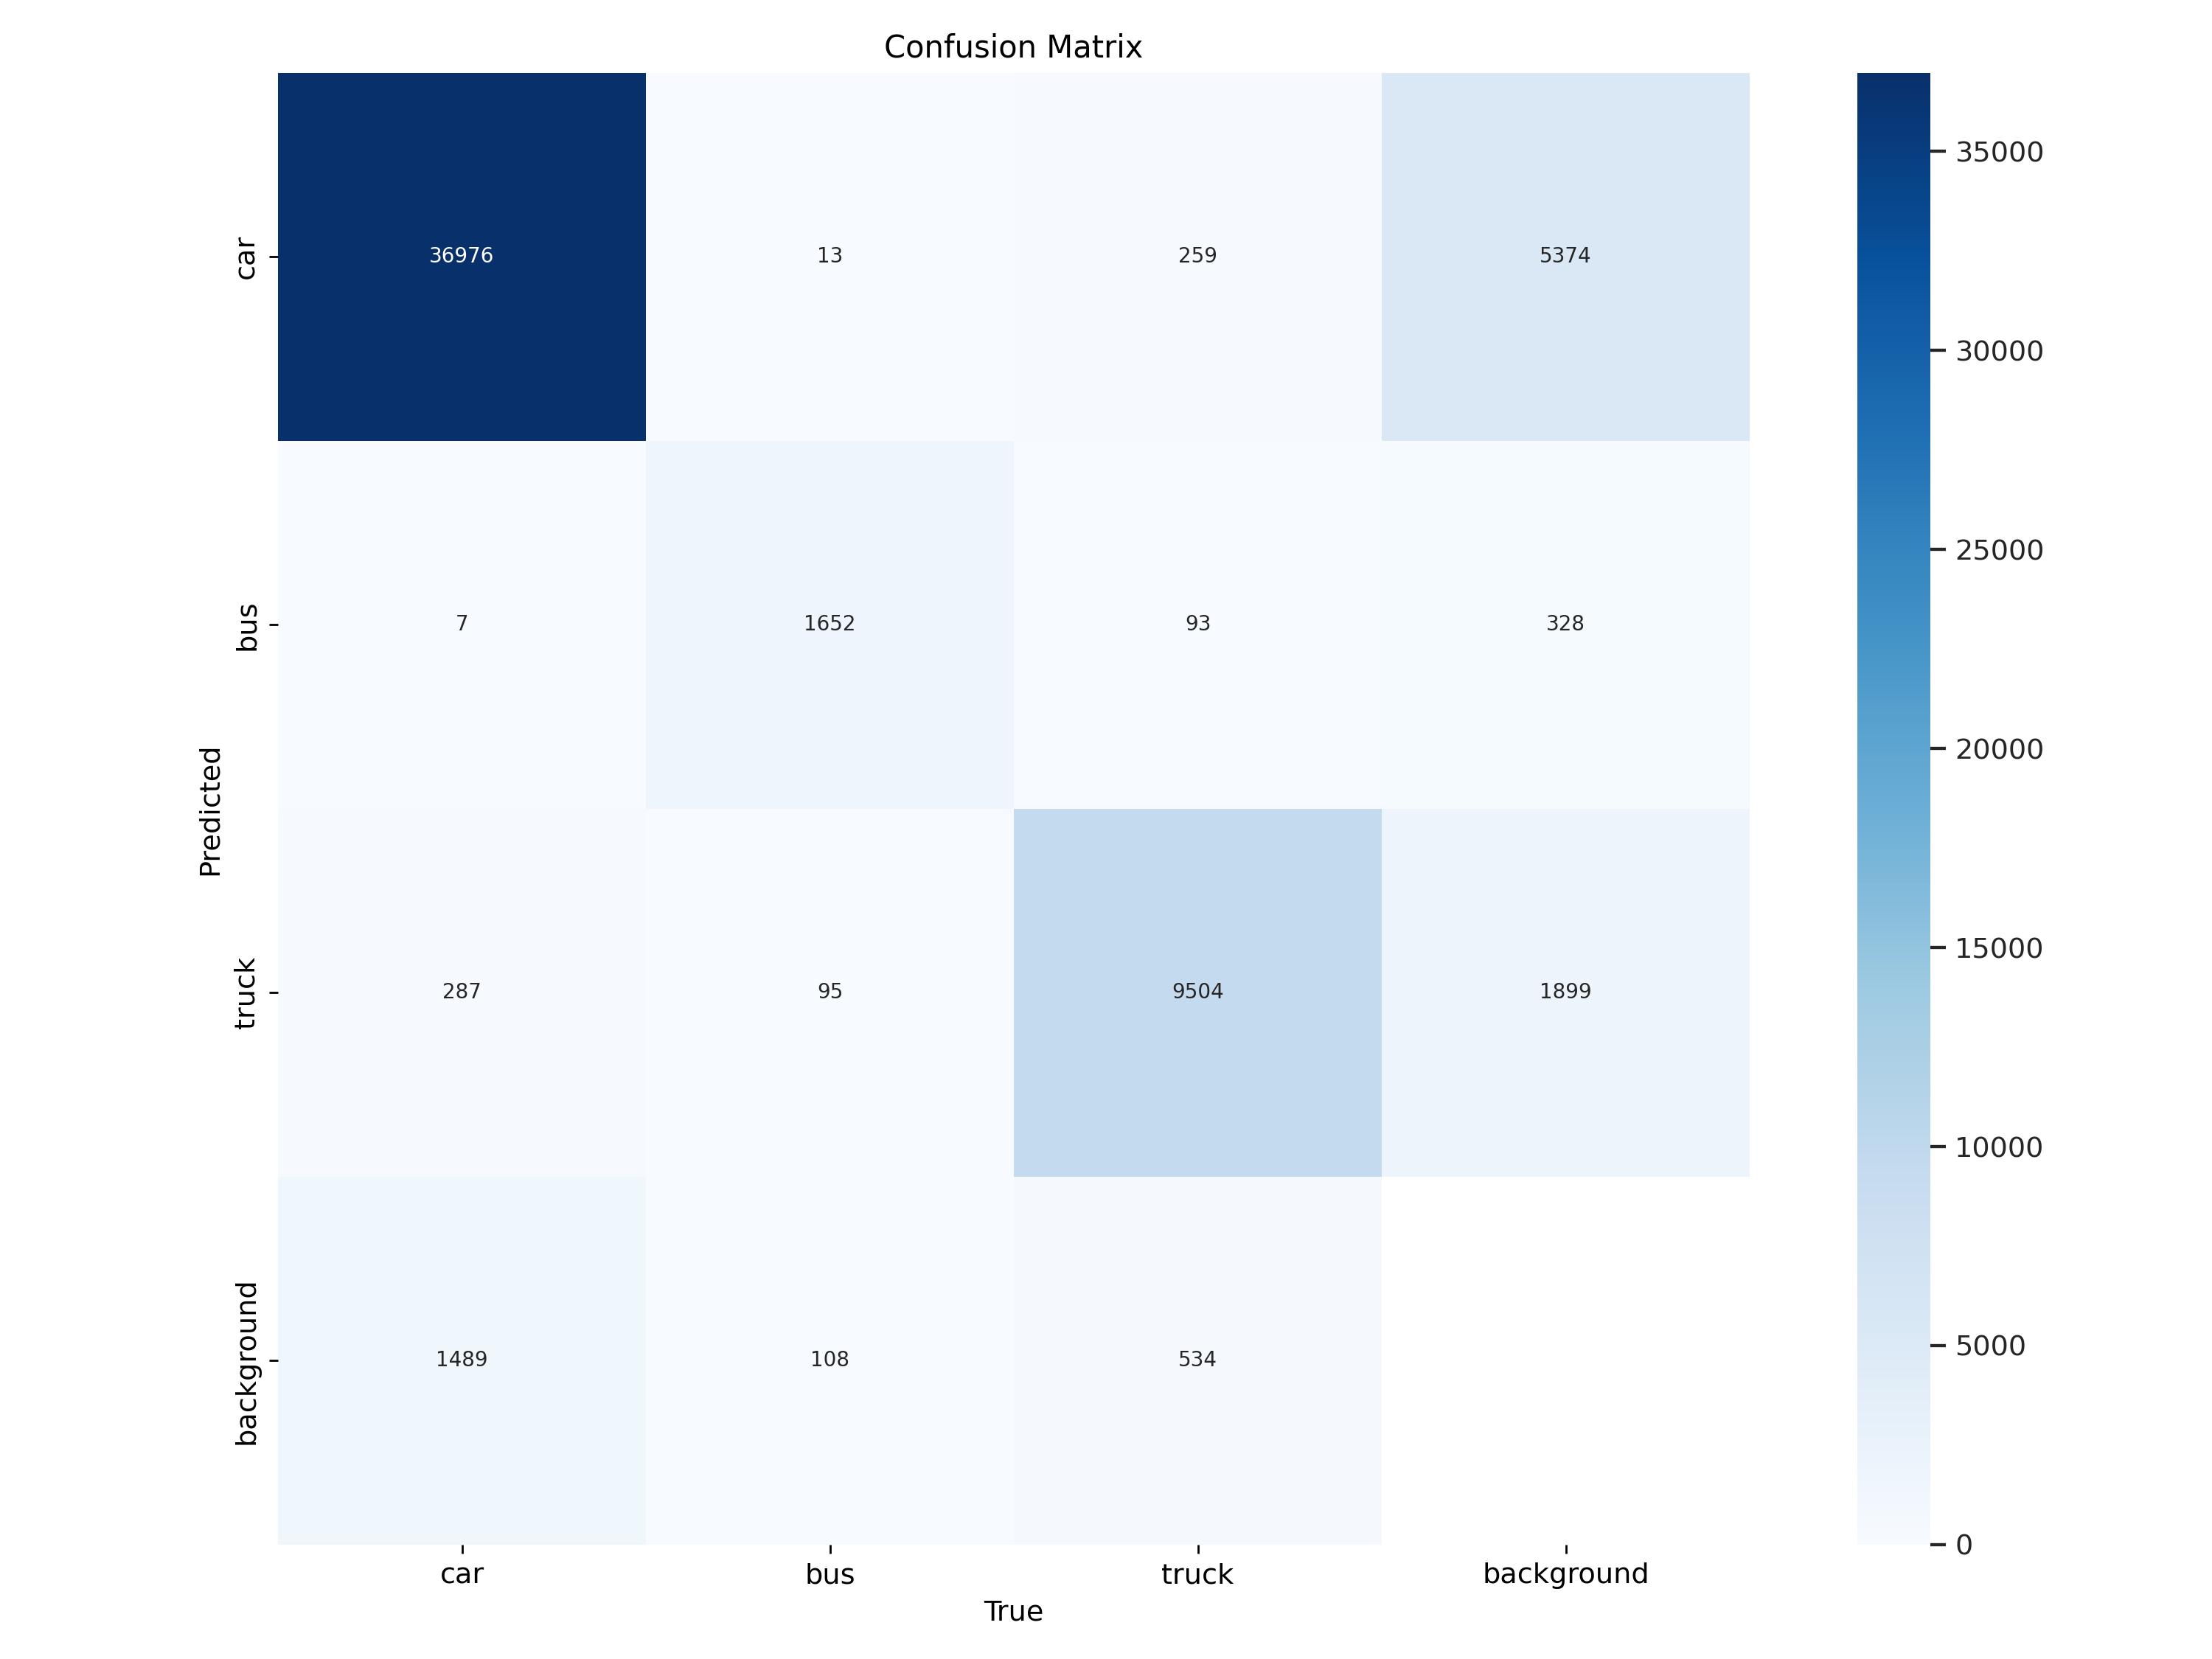

In [18]:
# confusion matrix 확인하기
%cd {HOME}
Image(filename=f'{HOME}/ultralytics/runs/detect/train2/confusion_matrix.png', width=6000)

/home/jupyter


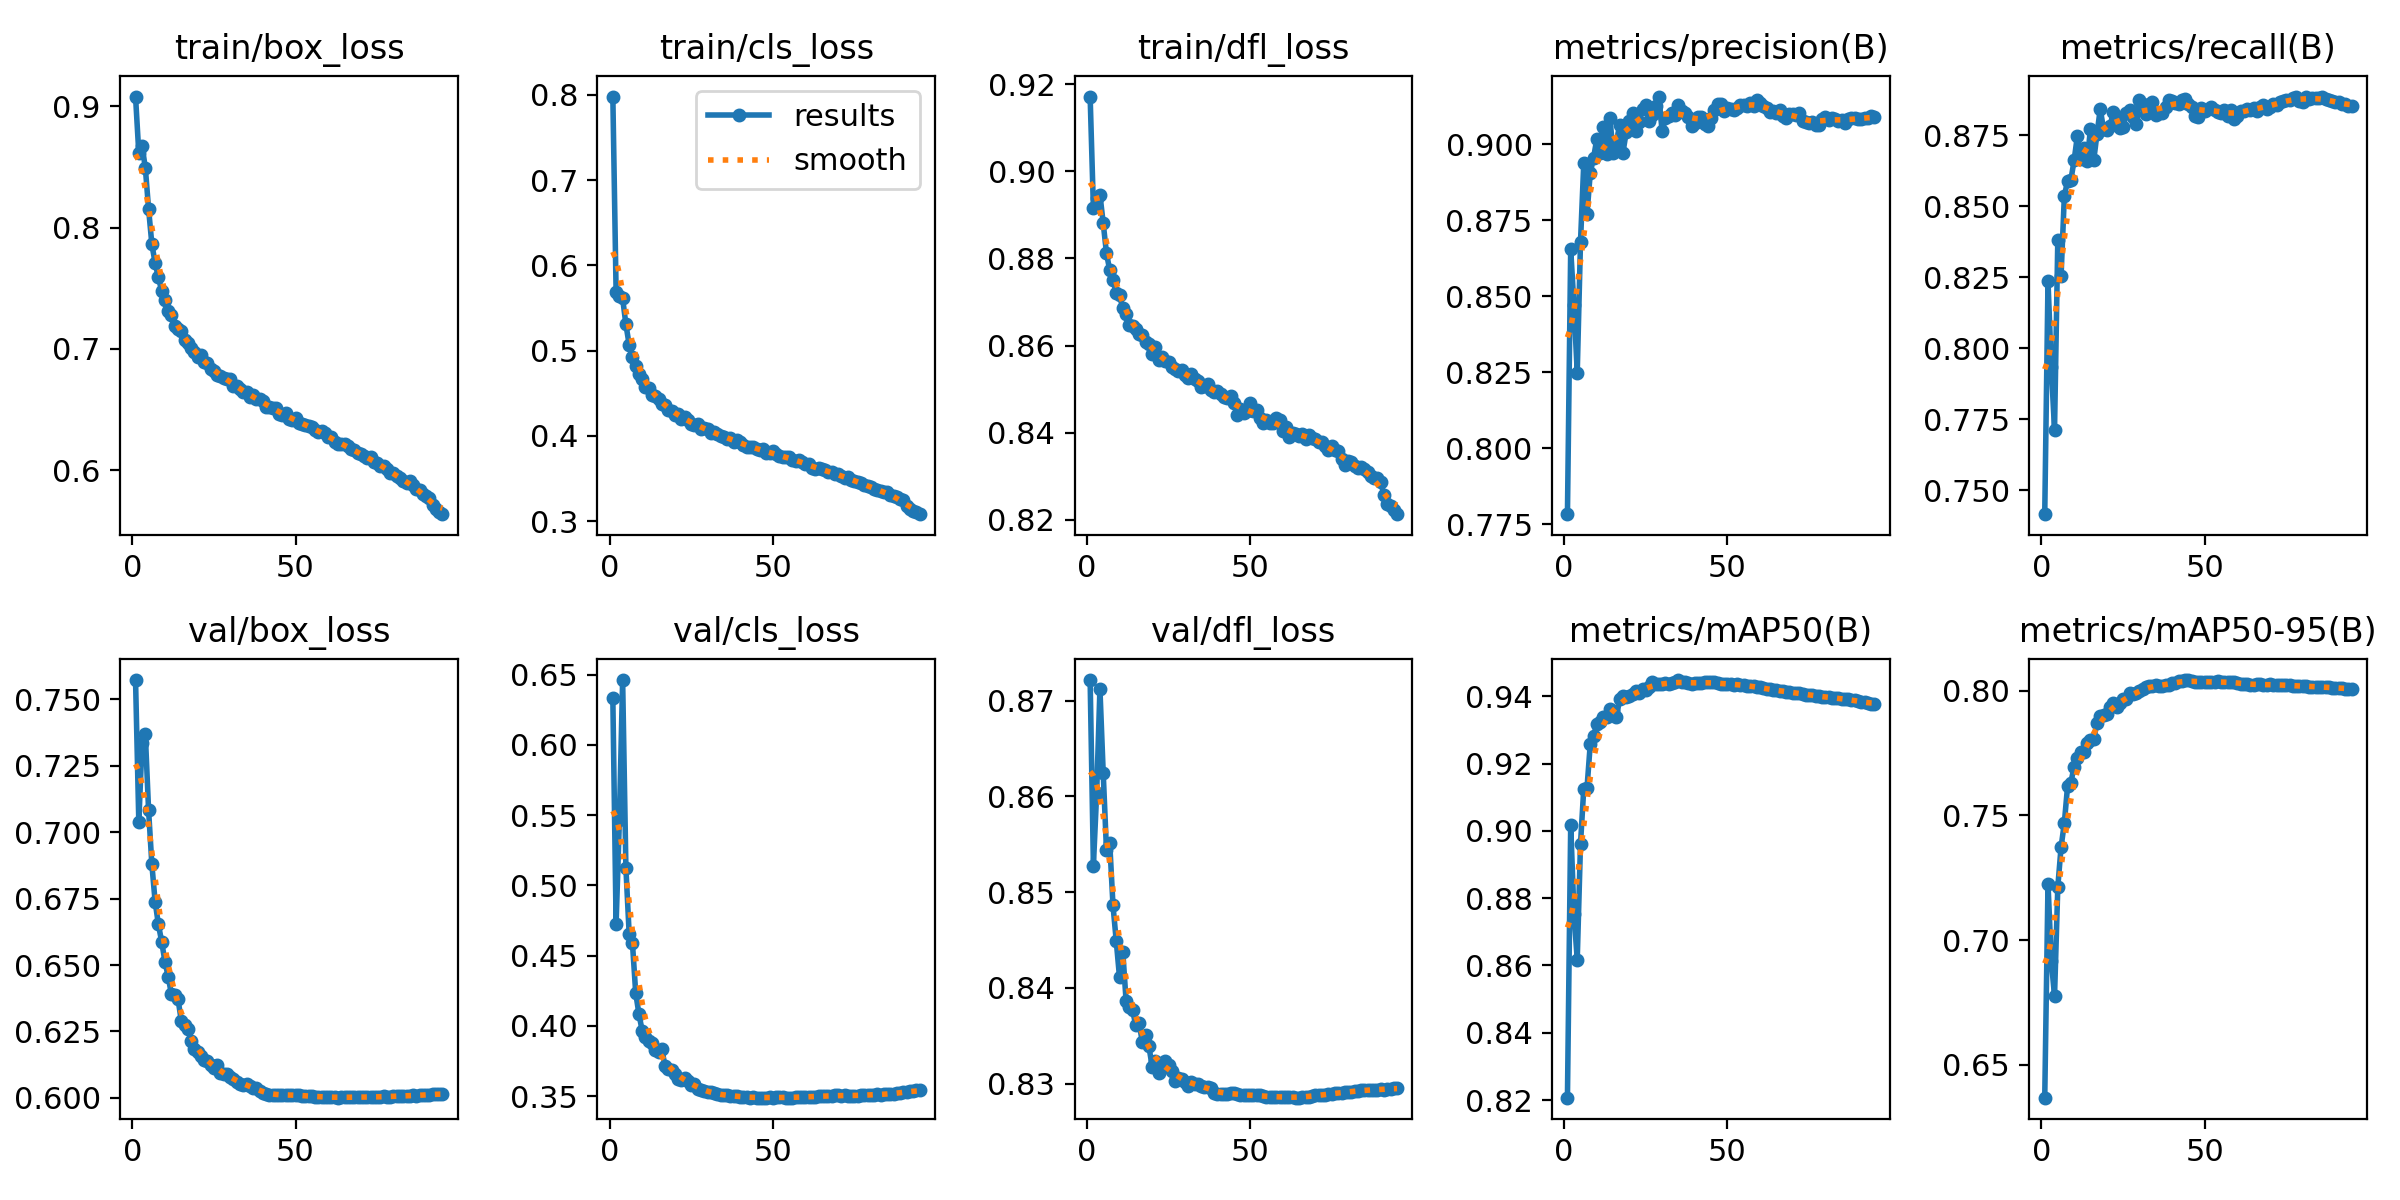

In [19]:
# loss값 및 map값 확인하기
%cd {HOME}
Image(filename=f'{HOME}/ultralytics/runs/detect/train2/results.png', width=6000)

/home/jupyter


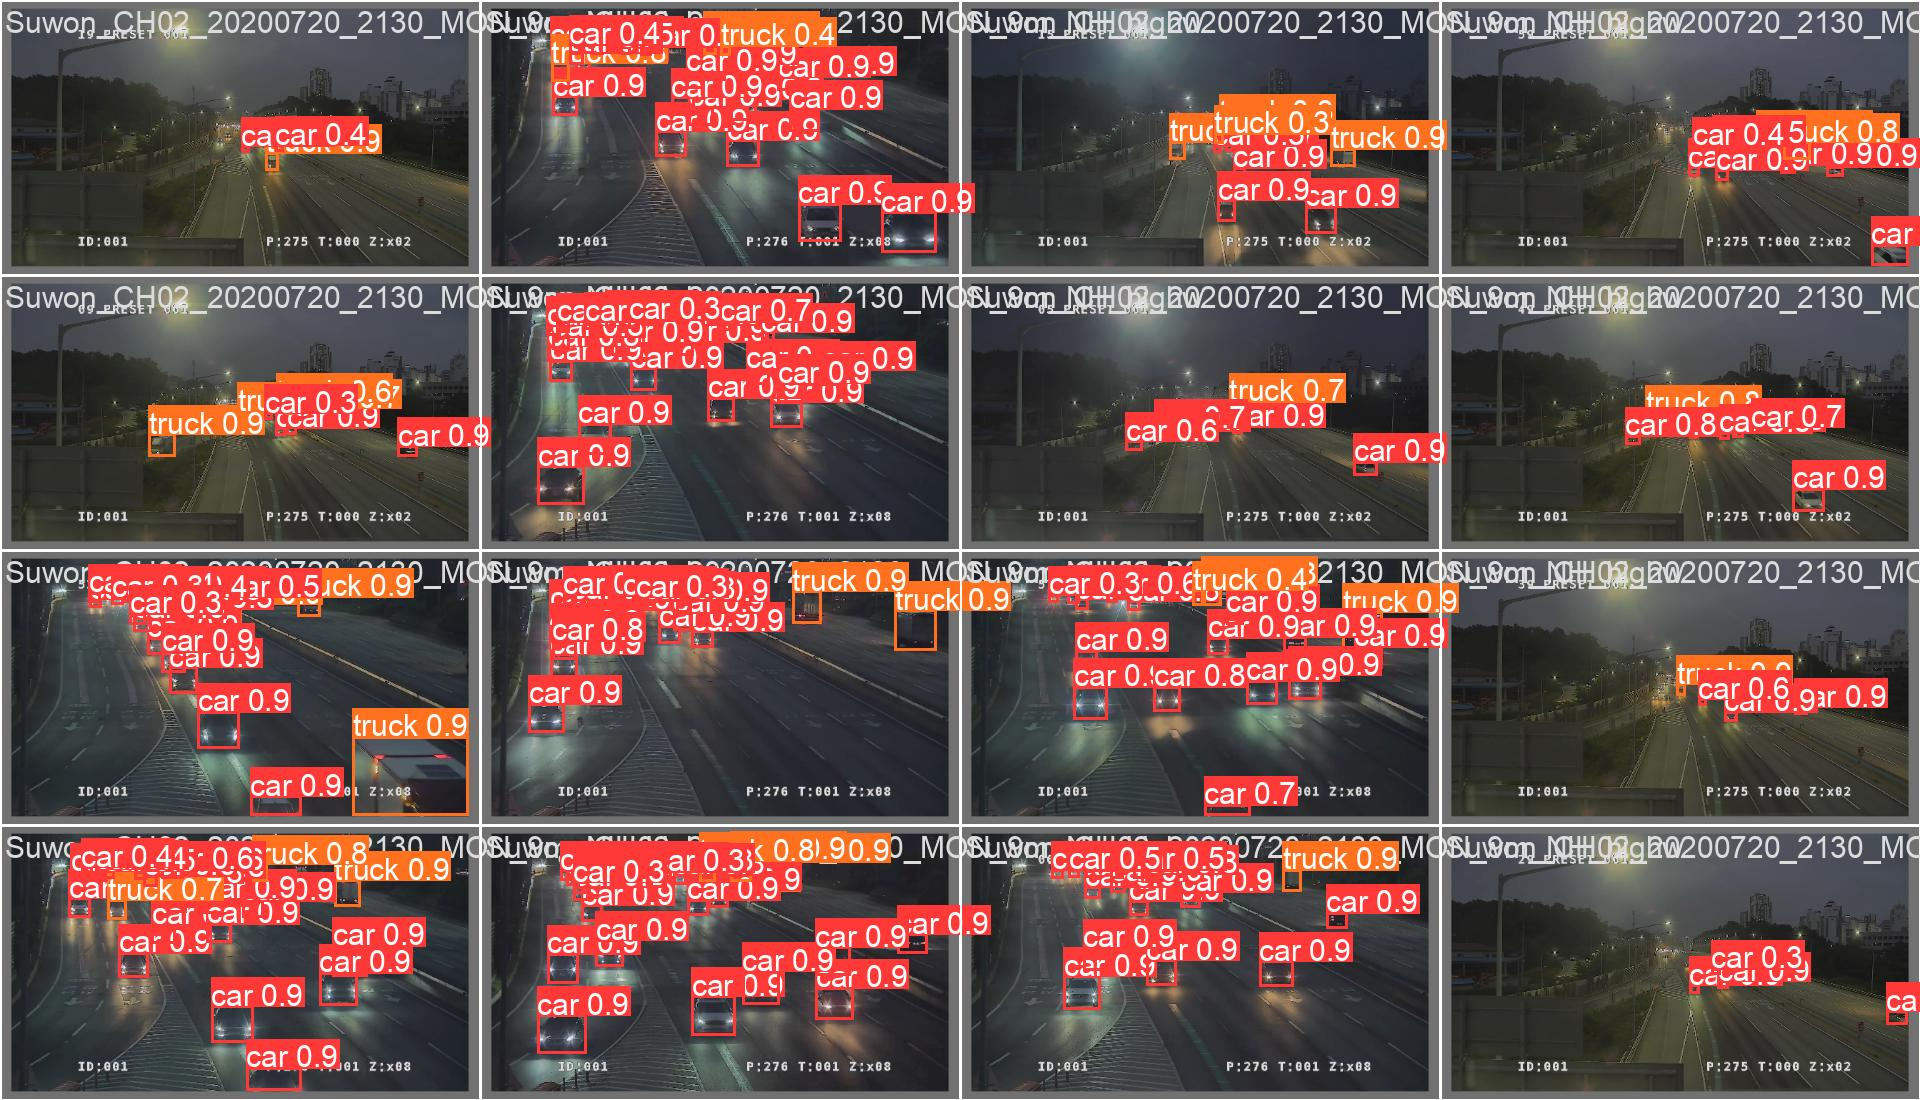

In [20]:
# 모델이 잘 학습되었는지 확인해보기
%cd {HOME}
Image(filename=f'{HOME}/ultralytics/runs/detect/train2/val_batch0_pred.jpg', width=6000)

# Validate Custom Model

In [21]:
!echo {HOME}

/home/jupyter


In [22]:
!yolo task=detect mode=val model={HOME}/ultralytics/runs/detect/train2/weights/best.pt data={HOME}/highway/data.yaml

Ultralytics YOLOv8.0.216 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA A100-SXM4-40GB, 40354MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /home/jupyter/highway/val/labels.cache... 3333 images, 0 backgroun
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       3333      51017      0.909      0.886      0.944      0.805
                   car       3333      38759      0.933      0.926      0.974      0.847
                   bus       3333       1868      0.903      0.853      0.916      0.777
                 truck       3333      10390      0.891      0.878      0.942      0.792
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [23]:
!yolo task=detect mode=val model={HOME}/ultralytics/runs/detect/train2/weights/last.pt data={HOME}/highway/data.yaml

Ultralytics YOLOv8.0.216 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA A100-SXM4-40GB, 40354MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /home/jupyter/highway/val/labels.cache... 3333 images, 0 backgroun
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       3333      51017      0.909      0.885      0.938      0.802
                   car       3333      38759      0.942      0.921      0.971      0.847
                   bus       3333       1868      0.899      0.858      0.908      0.773
                 truck       3333      10390      0.887      0.876      0.934      0.787
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


# Test Custom Model

In [24]:
!pip list | grep ultra

ultralytics                              8.0.216


In [ ]:
# 로컬에 다운받은 고속도로 CCTV 영상으로 model test 하는 방법
# model = '/home/jupyter/ultralytics/detect/train2/weights/best.pt'
# source = '{동영상 있는 디렉토리 입력}'
# !yolo task=detect mode=predict show=True model={model} source={source} imgsz=640 save=True name='highway_test'

In [ ]:
# Anaconda Prompt로 실시간 고속도로 차량 탐지하는 방법
# 컴퓨터에 웹캠 연결
# 지정 디렉토리에 train한 model의 best.pt 다운로드
# pyhton=3.9 가상환경 생성한 후 conda activate
# pip install ultralytics
# cd 명령어로 best.pt 있는 디렉토리로 변경
# yolo task=detect mode=predict model=best.pt conf=0.25 source=0 show=True 입력 후 실행